In [3]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
#check the shape of data
dataset.shape


(6000, 8)

In [6]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [7]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123 , train_size = 0.6)


 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(5400, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,643.2572,2471345.3222,1487.0319,0.9771,0.0674,0.0492,2.3354
1,Extra Trees Regressor,759.6455,3158143.4583,1702.1046,0.9705,0.0822,0.0604,0.5400
2,Extreme Gradient Boosting,739.9103,3041113.0782,1693.2795,0.9699,0.0780,0.0568,0.5652
3,Random Forest,790.2595,3676084.2005,1851.2608,0.9652,0.0838,0.0609,0.5050
4,Light Gradient Boosting Machine,805.9787,3921548.6338,1931.4503,0.9624,0.0812,0.0585,0.0880
5,Gradient Boosting Regressor,943.6884,4207951.3308,2014.6545,0.9589,0.1053,0.0789,0.2566
6,Decision Tree,1037.6648,5863001.2525,2345.5668,0.9417,0.1118,0.0799,0.0278
7,Ridge Regression,2387.5586,14222923.8360,3731.4751,0.8622,0.6741,0.2855,0.0254
8,Lasso Least Angle Regression,2335.0344,14390678.9002,3752.8541,0.8608,0.6546,0.2720,0.0545
9,Lasso Regression,2386.5536,14373107.7644,3753.0010,0.8607,0.6773,0.2846,0.1044


In [9]:

models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [10]:
###blacklist parameter is replaced with the term exclude and whitelist parameter will be replaced with the term include.

In [11]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2634.1369,27070128.2669,5202.8961,0.8032,0.5590,0.2868
1,2298.1644,11511150.5183,3392.8086,0.8766,0.6556,0.2977
2,2323.2707,11278654.9921,3358.3709,0.8823,0.6827,0.2639
3,2435.9532,9889437.8964,3144.7477,0.8676,0.6851,0.3316
4,2381.5888,14526134.4439,3811.3166,0.8636,0.7056,0.2906
5,2349.5447,15380266.8294,3921.7683,0.8669,0.5989,0.2726
6,2294.2145,12704279.4864,3564.3063,0.8624,0.5372,0.2557
7,2355.4712,13027530.8402,3609.3671,0.8574,0.7974,0.2821
8,2497.3064,15166910.5721,3894.4718,0.8544,0.8216,0.2849
9,2295.8857,13176583.7980,3629.9564,0.8724,0.7302,0.2804


In [12]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2633.0185,27017515.1173,5197.8375,0.8036,0.5542,0.2866
1,2303.3920,11525982.6944,3394.9938,0.8764,0.6391,0.2985
2,2326.2842,11285305.9740,3359.3609,0.8823,0.6897,0.2646
3,2446.4846,9953223.8117,3154.8730,0.8668,0.6418,0.3358
4,2388.3179,14527542.8426,3811.5014,0.8636,0.7705,0.2920
5,2373.1512,15697772.1142,3962.0414,0.8642,0.4490,0.2717
6,2365.8827,13045368.0370,3611.8372,0.8587,0.6030,0.2666
7,2354.9907,13159380.4475,3627.5860,0.8559,0.8049,0.2845
8,2508.0346,15789196.7651,3973.5622,0.8484,0.7930,0.2852
9,2298.1284,13182320.8651,3630.7466,0.8723,0.7329,0.2807


In [13]:
tuned_lasso = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2634.5362,27069560.9120,5202.8416,0.8032,0.5587,0.2869
1,2298.6032,11512785.1384,3393.0495,0.8766,0.6528,0.2978
2,2323.4199,11278964.0223,3358.4169,0.8823,0.6823,0.2639
3,2436.5630,9893867.4369,3145.4519,0.8676,0.6837,0.3317
4,2381.9938,14524772.9954,3811.1380,0.8636,0.7061,0.2907
5,2348.5729,15283488.1827,3909.4102,0.8678,0.5982,0.2726
6,2294.3728,12704140.3448,3564.2868,0.8624,0.5358,0.2557
7,2355.5769,13027680.2559,3609.3878,0.8574,0.7950,0.2822
8,2498.8184,15251036.9021,3905.2576,0.8536,0.8111,0.2850
9,2296.0261,13175760.7984,3629.8431,0.8724,0.7328,0.2805


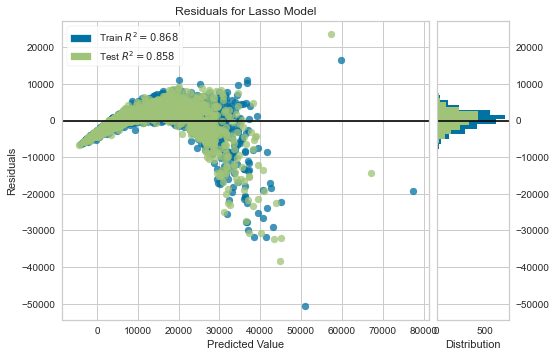

In [14]:
plot_model(tuned_lasso)

In [15]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4213.8529,30097397.0657,5486.1095,0.7812,0.4629,0.5329
1,4262.4656,23925865.5795,4891.4073,0.7435,0.5283,0.6267
2,3923.3883,20303196.2470,4505.9068,0.7882,0.4684,0.5308
3,4144.4077,28259659.1127,5315.9815,0.6217,0.4976,0.5787
4,4326.8797,27047690.1080,5200.7394,0.7460,0.5475,0.6507
5,4016.3583,25497227.6277,5049.4780,0.7794,0.4739,0.5445
6,4333.2502,26261132.6854,5124.5617,0.7155,0.4965,0.5756
7,4280.2707,25328913.6890,5032.7839,0.7227,0.4980,0.5792
8,3711.9484,21302013.9820,4615.4105,0.7955,0.4595,0.5072
9,3752.9640,20027601.7351,4475.2209,0.8061,0.5019,0.5750


In [16]:

print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [17]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,939.3797,8017931.0162,2831.5951,0.9417,0.0821,0.0592
1,744.3647,2789889.2125,1670.2961,0.9701,0.0824,0.0575
2,794.2624,2208045.7726,1485.9495,0.9770,0.0742,0.0578
3,774.1650,3095553.5305,1759.4185,0.9586,0.0847,0.0592
4,748.2675,2619943.7583,1618.6240,0.9754,0.0765,0.0556
5,798.3706,7021185.8461,2649.7520,0.9393,0.0807,0.0561
6,760.0049,3360519.2130,1833.1719,0.9636,0.0777,0.0559
7,836.1068,3078750.1676,1754.6368,0.9663,0.0816,0.0620
8,913.6501,4485550.9232,2117.9119,0.9569,0.0959,0.0643
9,751.2150,2538116.8982,1593.1469,0.9754,0.0759,0.0574


In [18]:

dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1176.2964,11398580.5099,3376.1784,0.9172,0.1116,0.0813
1,897.3115,3217058.9390,1793.6162,0.9655,0.1051,0.0756
2,942.3547,2718520.6198,1648.7937,0.9716,0.1015,0.0738
3,1149.0358,10568813.1604,3250.9711,0.8585,0.1263,0.0895
4,1051.8156,5531998.5718,2352.0201,0.9480,0.1152,0.0824
5,1182.0075,8071724.2727,2841.0780,0.9302,0.1238,0.0827
6,877.4352,2450219.9081,1565.3178,0.9735,0.0956,0.0713
7,1005.5775,4443311.1071,2107.9163,0.9514,0.1177,0.0847
8,1078.8933,4715751.1554,2171.5780,0.9547,0.1140,0.0813
9,1015.9210,5514034.2812,2348.1981,0.9466,0.1076,0.0762


In [19]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3087.5197,24332234.5617,4932.7715,0.8231,0.3402,0.3405
1,2924.1597,14429694.8030,3798.6438,0.8453,0.3535,0.3594
2,2925.4937,15064469.1632,3881.2974,0.8428,0.3391,0.3297
3,2765.7996,15050995.6039,3879.5613,0.7985,0.3349,0.3238
4,2862.1742,17935490.6470,4235.0314,0.8315,0.3508,0.3444
5,2968.3265,20299240.4508,4505.4678,0.8244,0.3559,0.3511
6,2895.1158,17025573.6763,4126.2057,0.8156,0.3304,0.3186
7,3060.8456,18137186.6102,4258.7776,0.8014,0.3451,0.3450
8,2768.8321,17806923.7273,4219.8251,0.8290,0.3308,0.3097
9,2675.8961,14480846.9965,3805.3708,0.8598,0.3411,0.3381


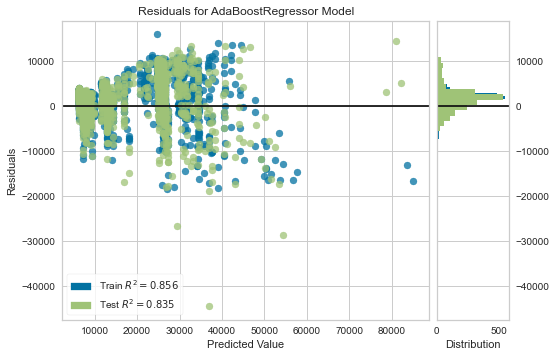

In [20]:
plot_model(tuned_ada)

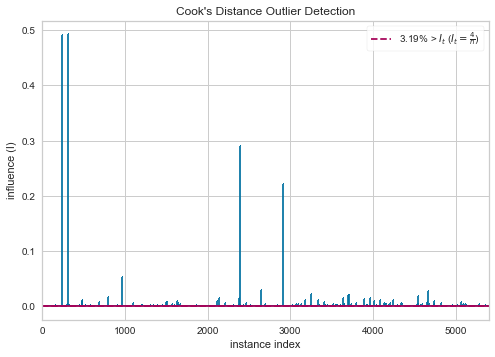

In [21]:
plot_model(tuned_ada, plot = 'cooks')

In [22]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.20999999999999996,
                  loss='exponential', n_estimators=90, random_state=123)


In [23]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [24]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,831.8150,2989803.2779,1729.1048,0.9783,0.0794,0.0605
1,797.9859,2434331.3018,1560.2344,0.9739,0.0833,0.0616
2,814.5565,2310290.6888,1519.9640,0.9759,0.0791,0.0614
3,887.8657,5164317.9822,2272.5136,0.9309,0.0934,0.0634
4,736.9236,2167272.8026,1472.1660,0.9796,0.0842,0.0611
5,872.0828,6280633.7465,2506.1193,0.9457,0.0877,0.0626
6,819.5093,3234580.9567,1798.4941,0.9650,0.0840,0.0609
7,835.8985,2678814.6635,1636.7085,0.9707,0.0855,0.0642
8,920.8678,4417527.7247,2101.7916,0.9576,0.1038,0.0685
9,742.6451,1990302.9651,1410.7810,0.9807,0.0831,0.0623


In [25]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.6, max_depth=50,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=20, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [26]:
print(type(tuned_lightgbm))

<class 'lightgbm.sklearn.LGBMRegressor'>


In [27]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1166.7809,11624698.5972,3409.5012,0.9155,0.1109,0.0774
1,986.0309,4007768.9846,2001.9413,0.9570,0.1141,0.0813
2,1015.9429,3243012.1381,1800.8365,0.9662,0.1113,0.0793
3,1198.0694,6416383.6566,2533.0582,0.9141,0.1343,0.0930
4,950.3719,3039624.1813,1743.4518,0.9715,0.1082,0.0808
5,1132.9336,10292810.1350,3208.2410,0.9110,0.1174,0.0808
6,988.7485,4487574.9529,2118.3897,0.9514,0.1000,0.0753
7,993.2824,3105936.6644,1762.3668,0.9660,0.1097,0.0809
8,1185.5617,6982361.5432,2642.4159,0.9330,0.1286,0.0879
9,1025.5216,5565103.6173,2359.0472,0.9461,0.1113,0.0789


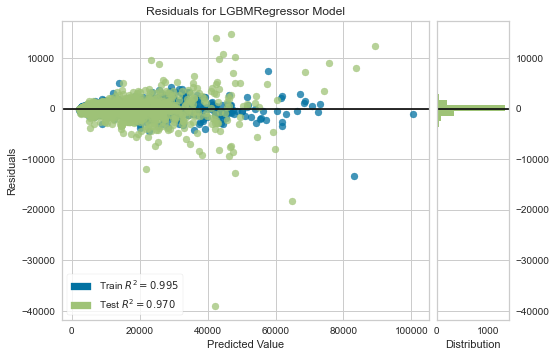

In [28]:
plot_model(tuned_lightgbm)

In [29]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

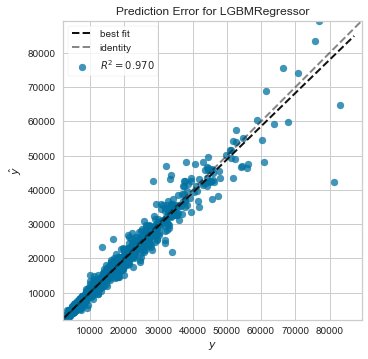

In [30]:
plot_model(tuned_lightgbm, plot = 'error')

In [31]:
result_lasso = predict_model(tuned_lasso) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso,2440.633,15134296.58,3890.2823,0.8585,0.5717,0.2675


In [32]:
result_lasso.columns

Index(['Carat Weight', 'Cut_Fair', 'Cut_Good', 'Cut_Ideal',
       'Cut_Signature-Ideal', 'Cut_Very Good', 'Color_D', 'Color_E', 'Color_F',
       'Color_G', 'Color_H', 'Color_I', 'Clarity_FL', 'Clarity_IF',
       'Clarity_SI1', 'Clarity_VS1', 'Clarity_VS2', 'Clarity_VVS1',
       'Clarity_VVS2', 'Polish_EX', 'Polish_G', 'Polish_ID', 'Polish_VG',
       'Symmetry_EX', 'Symmetry_G', 'Symmetry_ID', 'Symmetry_VG',
       'Report_AGSL', 'Report_GIA', 'Price', 'Label'],
      dtype='object')

In [33]:
tuned_lasso.coef_

array([ 1.81687966e+04, -2.68938636e+02, -4.66469187e+02,  3.74723871e+02,
        1.64550606e+03,  0.00000000e+00,  4.42349669e+03,  2.28024488e+03,
        1.52958608e+03, -3.20907329e-01, -1.61820431e+03, -3.12468598e+03,
        3.46620175e+04,  5.86912317e+03, -4.29208889e+03, -1.47735942e+03,
       -2.79232880e+03,  1.31629037e+03,  0.00000000e+00,  1.75011004e+02,
       -4.93752323e+00, -0.00000000e+00,  0.00000000e+00,  6.98686684e+01,
       -0.00000000e+00,  0.00000000e+00, -1.28491332e+01, -2.25802742e+02,
        7.20137826e-13])

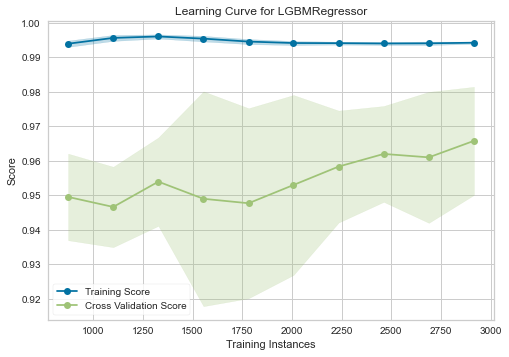

In [34]:
plot_model(tuned_lightgbm, plot='learning')

In [35]:
print(tuned_lasso.coef_)

[ 1.81687966e+04 -2.68938636e+02 -4.66469187e+02  3.74723871e+02
  1.64550606e+03  0.00000000e+00  4.42349669e+03  2.28024488e+03
  1.52958608e+03 -3.20907329e-01 -1.61820431e+03 -3.12468598e+03
  3.46620175e+04  5.86912317e+03 -4.29208889e+03 -1.47735942e+03
 -2.79232880e+03  1.31629037e+03  0.00000000e+00  1.75011004e+02
 -4.93752323e+00 -0.00000000e+00  0.00000000e+00  6.98686684e+01
 -0.00000000e+00  0.00000000e+00 -1.28491332e+01 -2.25802742e+02
  7.20137826e-13]


In [36]:
print(dataset)

      Carat Weight              Cut Color Clarity Polish Symmetry Report  \
0             1.10            Ideal     H     SI1     VG       EX    GIA   
1             0.83            Ideal     H     VS1     ID       ID   AGSL   
2             0.85            Ideal     H     SI1     EX       EX    GIA   
3             0.91            Ideal     E     SI1     VG       VG    GIA   
4             0.83            Ideal     G     SI1     EX       EX    GIA   
...            ...              ...   ...     ...    ...      ...    ...   
5995          1.03            Ideal     D     SI1     EX       EX    GIA   
5996          1.00        Very Good     D     SI1     VG       VG    GIA   
5997          1.02            Ideal     D     SI1     EX       EX    GIA   
5998          1.27  Signature-Ideal     G     VS1     EX       EX    GIA   
5999          2.19            Ideal     E     VS1     EX       EX    GIA   

      Price  
0      5169  
1      3470  
2      3183  
3      4370  
4      3171  
...

In [37]:
### evaluate_model(tuned_lightgbm)


In [38]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,801.8838,3.170690e+06,1780.6431,0.9703,0.0845,0.0606


In [39]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [40]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.6, max_depth=50,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=20, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [41]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,467.7822,591989.5161,769.4085,0.9945,0.0581,0.0431


In [42]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
index,,,,,,,,,
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12814.6157
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10453.7118
2,1.01,Good,E,SI1,G,G,GIA,5161,5072.2789
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,36528.4483
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4120.8012


In [43]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9743

In [44]:
save_model(final_lightgbm,'Final Lightgbm Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


In [45]:
saved_final_lightgbm = load_model('Final Lightgbm Model 08Feb2020')

Transformation Pipeline and Model Successfully Loaded


In [46]:

new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [47]:
from pycaret.utils import check_metric
check_metric(new_prediction.Price, new_prediction.Label, 'R2')

0.9743